Andrew Carr

## Imports

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB


from sklearn.metrics import roc_curve

plt.style.use("ggplot")


# Problem 1
Find some aspect of your final research project where a naïve Bayes classifier is appropriate, and apply Naive Bayes to that.  Compare the result to what logistic regression and support vector machines give you on the same data. 

In [119]:
bronze = pd.read_csv("bronze.csv")
silver = pd.read_csv("silver.csv")
gold = pd.read_csv("gold.csv")
plat = pd.read_csv("plat.csv")
platplus = pd.read_csv("platplus.csv")
data = [[bronze, 'bronze'], [silver, 'silver'], [gold, 'gold'], [plat, 'plat'], [platplus, 'platplus']]

In [134]:
y = ['Role_Code']
x = ['Win Percent','Minions Killed', 'Total Healing', 'Team Jungle CS','Kills', 'Assists', 'Deaths', 'Damage Dealt', 'Damage Taken', 'Gold Earned']
nb_clf = MultinomialNB()
log_clf = LogisticRegression()
svm_clf = svm.SVC()

for datum, label in data:
    train_x, test_x, train_y, test_y = train_test_split(datum[x], datum[y])
    nb_clf.fit(train_x, train_y)
    log_clf.fit(train_x, train_y)
    svm_clf.fit(train_x, train_y)
    
    print("\n" + label + "\n")

    print("Naive Bayes {}".format(nb_clf.score(test_x, test_y)))
    print("Logistic Regression {}".format(log_clf.score(test_x, test_y)))
    print("SVM {}".format(svm_clf.score(test_x, test_y)))
    
    

    


bronze

Naive Bayes 0.5961538461538461
Logistic Regression 0.8653846153846154
SVM 0.23076923076923078

silver

Naive Bayes 0.45098039215686275
Logistic Regression 0.9019607843137255
SVM 0.29411764705882354

gold

Naive Bayes 0.56
Logistic Regression 0.96
SVM 0.28

plat

Naive Bayes 0.5098039215686274
Logistic Regression 0.9215686274509803
SVM 0.3137254901960784

platplus

Naive Bayes 0.49019607843137253
Logistic Regression 0.9019607843137255
SVM 0.27450980392156865


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


As you notice, since my problem is a multi category problem which means NB and SVM use one vs one or one vs rest and those are not robust methods for these classifiers which excel at binary classification. However, logistic regression, which has a higher multi category capacity performs very well as we see in the test accuracy above. This is quite interesting since we are trying to predict champion role in LoL data. Obviously my project will have a much more detailed explaination of the data. But for now, this is an interesting result that compares the classifiers. 

# Problem 2
Plot the ROC (scikit-learn has an ROC function you can use) for the following classifiers on the scikit-learn cancer dataset
1. naïve Bayes,

2. logistic regression, and

3. support vector machines (with probabilities, not just classification)

<hr>

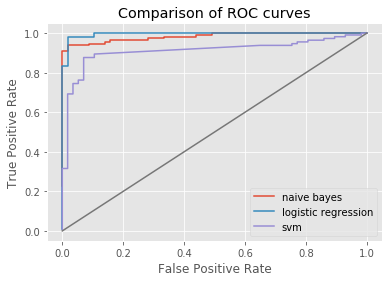

In [85]:
data = datasets.load_breast_cancer()
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target, train_size=0.7)

nb_clf = GaussianNB()
log_clf = LogisticRegression()
svm_clf = svm.SVC(probability=True)

# fit our models
nb_clf.fit(train_x, train_y)
log_clf.fit(train_x, train_y)
svm_clf.fit(train_x, train_y)

# get the probability of both classes
nb_pred = nb_clf.predict_proba(test_x)
log_pred = log_clf.predict_proba(test_x)
svm_pred = svm_clf.predict_proba(test_x)

# we have to pull out the probability of a positive
nb_fpr, nb_tpr, nb_threshold = roc_curve(test_y,nb_pred[:,1])
log_fpr, log_tpr, log_threshold = roc_curve(test_y, log_pred[:,1])
svm_fpr, svm_tpr, svm_threshold = roc_curve(test_y, svm_pred[:,1])

# notice that 1's are encoded as benign vs malignant
plt.plot(nb_fpr, nb_tpr, label="naive bayes")
plt.plot(log_fpr, log_tpr, label="logistic regression")
plt.plot(svm_fpr, svm_tpr, label="svm")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))

plt.title("Comparison of ROC curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Problem 3
Describe an appropriate cost function of the form a*FPR + b*FNR (that is, choose meaningful values of a and b) for the cancer dataset, assuming you are an insurance company that has to pay medical costs of treatment and also life insurance at death for each patient.  Given that cost function, use the ROC in the traditional manner (not Jarvis's new way) to identify the optimal choice of threshold τ for each of the three classifiers in part 2

<hr>

Just notice that a is associated with death and b is associated with medical expense. That is because benign is 1 in our dataset. This is important because it means that False Positives means we claim it is benign when it is infact malignant. And False Negatives means we claim that it isn't benign when it is. Therefore, we as a caring profession, care more about False Positives and want to prevent those. Since no cost can be put on a human life. 

In [104]:
a, b = 10, 1
nb_costs = np.array([[a*nb_fpr[i]+b*(1-nb_tpr[i]), nb_threshold[i]] for i in range(len(nb_fpr))])
log_costs = np.array([[a*log_fpr[i]+b*(1-log_tpr[i]), log_threshold[i]] for i in range(len(log_fpr))])
svm_costs = np.array([[a*svm_fpr[i]+b*(1-svm_tpr[i]), svm_threshold[i]] for i in range(len(svm_fpr))])

print("""
naive bayes threshold {}\n
logistic threshold {}\n
svm threshold {}\n
""".format(sorted(nb_costs, key=lambda x:x[0])[0][1], sorted(log_costs, key=lambda x:x[0])[0][1], sorted(svm_costs, key=lambda x:x[0])[0][1]))


naive bayes threshold 0.9999289067479927

logistic threshold 0.9239827626504489

svm threshold 0.5854728106107705


